In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import math

#Data Exploration

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset.csv", delimiter=';')

In [ ]:
df_original = df.copy()

In [ ]:
df["Datum"] = pd.to_datetime(df["Datum"])

In [ ]:
for col in df.iloc[:,1:].columns:
    if df[col].dtype == 'object':
      df[col] = df[col].str.replace(',', '.').astype(float)

In [ ]:
df.head()

,Datum,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Columns: 165 entries, Datum to 164
dtypes: float64(161), object(4)
memory usage: 3.7+ MB


In [ ]:
df.shape

(2976, 165)

In [ ]:
# columns_to_check = ["86", "45", "4", "127", "45"]

# for col in columns_to_check:
#     print(f"Value counts for column {col}:")
#     print(df[col].value_counts())
#     print(df[col].unique())
#     print("-" * 50)

In [ ]:
# # Find columns that contain negative values
# list_of_neg_col = []
# df_copy = df.copy()
# for col in df.iloc[:,1:].columns:
#     if df_copy[col].dtype == 'object':
#       df_copy[col] = df_copy[col].str.replace(',', '.').astype(float)
#     if (df_copy[col] < 0.0).any():
#       list_of_neg_col.append(col)

In [ ]:
# list_of_neg_col

In [ ]:
df_nulls = df.isnull().sum()

In [ ]:
df_nulls.info()

<class 'pandas.core.series.Series'>
Index: 165 entries, Datum to 164
Series name: None
Non-Null Count  Dtype
--------------  -----
165 non-null    int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [ ]:
for col in df.columns:
  if not df[col].isnull().values.any():
    print(col)

Datum


**So, The only column in the dataframe which is not null is 'Datum'.**

In [ ]:
df_nulls = df_nulls[1:]

In [ ]:
df_nulls.describe()

count    164.000000
mean      89.274390
std        9.337126
min       65.000000
25%       83.000000
50%       88.500000
75%       95.000000
max      116.000000
dtype: float64

In [ ]:
df_nulls.median()

88.5

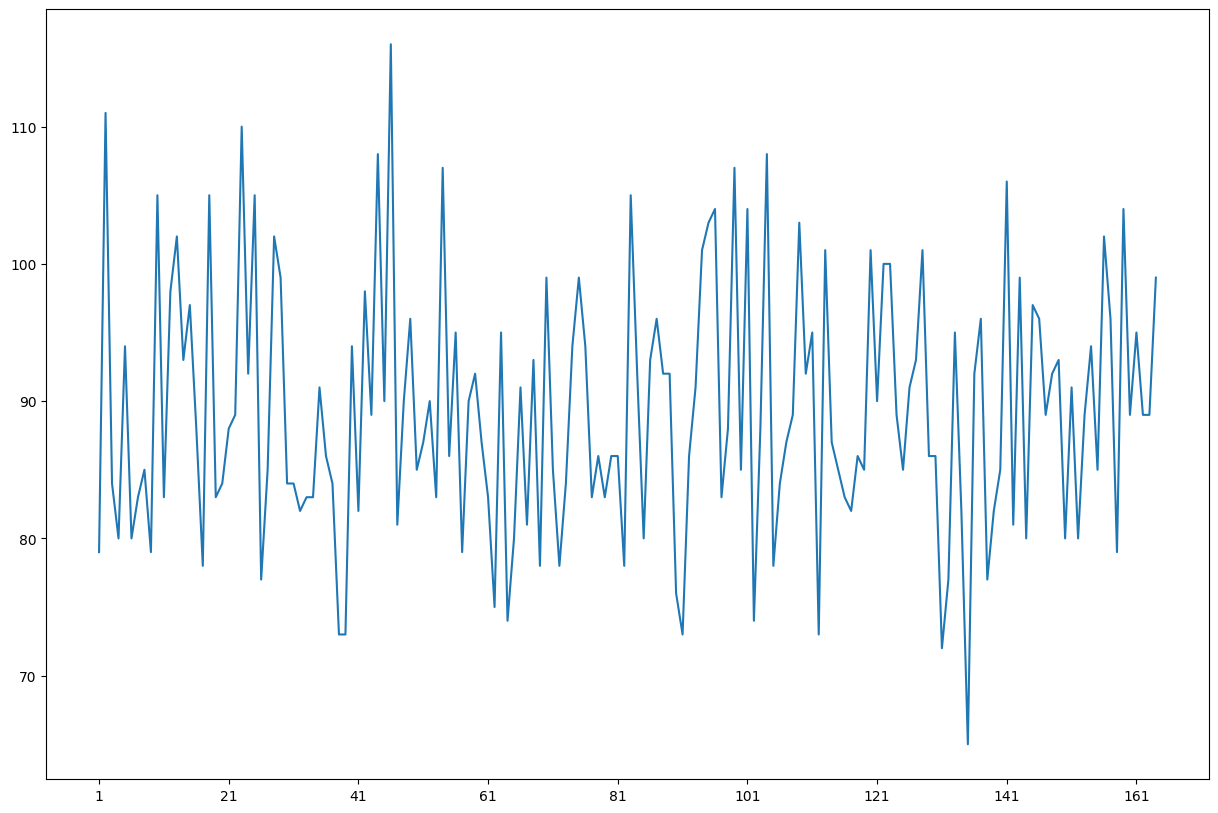

In [ ]:
df_nulls.plot(figsize=(15,10))
plt.show()

In [ ]:
df.isnull().sum().sum()

14641

**Observations:**

* Subsystems(columns) that are empty- 4, 86 aand 127.

* Subsystems(columns) that contain negative values- 9, 45 and 100. The column  45 contains only negative values which is -1.

* The df_nulls.info() tells that every subsystem has missing values and the "describe" indicates that it ranges from 65 to 116. The columns have mean number of 89.27 missing values whereas median says it's around 88.5. This can be seen from above plot where 'y=89' seems to be intersecting most of the values.

* Total number of Null values in the dataframe of shape 2975*164 is 14641.



---



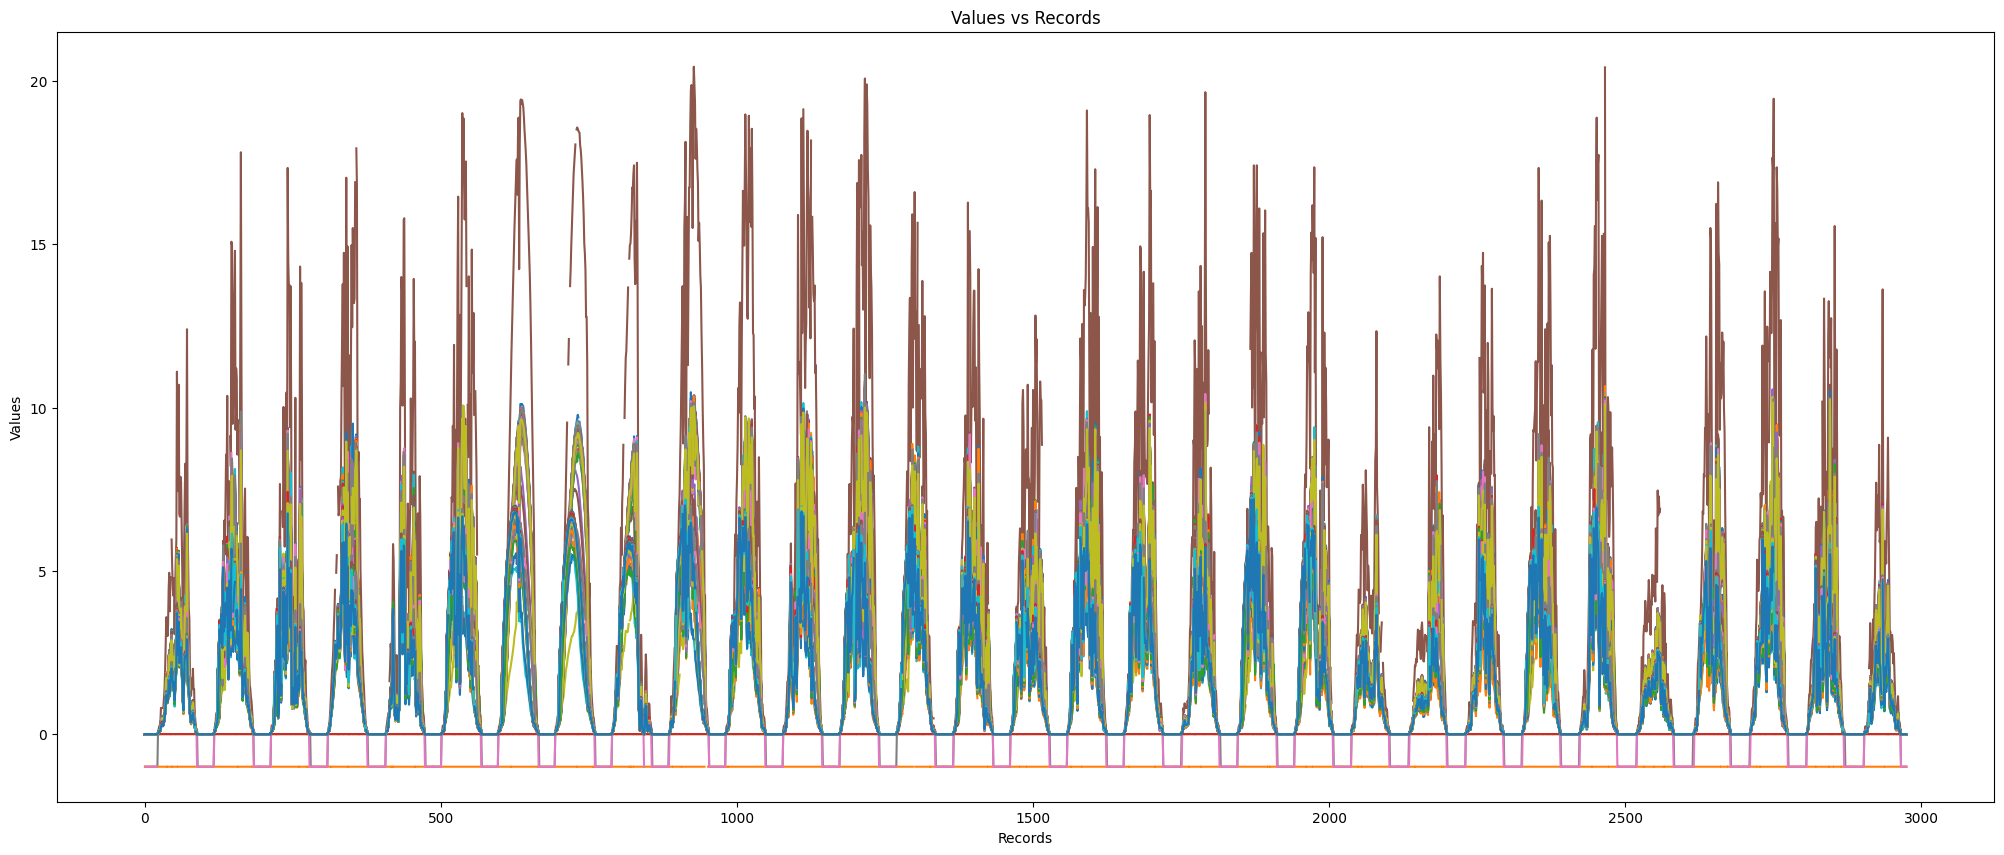

In [ ]:
# Distribution of values for each subsystems
df_original.plot(figsize=(25,10), legend=False, xlabel='Records', ylabel='Values', title='Values vs Records')
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df is your dataframe
# df_copy = df.copy()  # working on a copy to avoid modifying original df

# # Assuming the dataframe has a single column for simplicity. Adjust as needed.
# # Calculate the difference between consecutive records to find local maxima
# df_copy['diff1'] = df_copy.iloc[:,1].diff(1)  # difference with the previous record
# df_copy['diff2'] = df_copy.iloc[:,1].diff(-1)  # difference with the next record

# # Identify local maxima positions
# local_maxima_positions = df_copy[(df_copy['diff1'] > 0) & (df_copy['diff2'] > 0)].index

# # Plotting
# ax = df.iloc[:,0].plot(figsize=(25,10), legend=False, xlabel='Records', ylabel='Values', title='Values vs Records')

# # Setting x-ticks at local maxima positions and labeling them with timestamps
# ax.set_xticks(local_maxima_positions)
# ax.set_xticklabels(local_maxima_positions, rotation=45)  # rotating for better readability

# plt.tight_layout()
# plt.show()


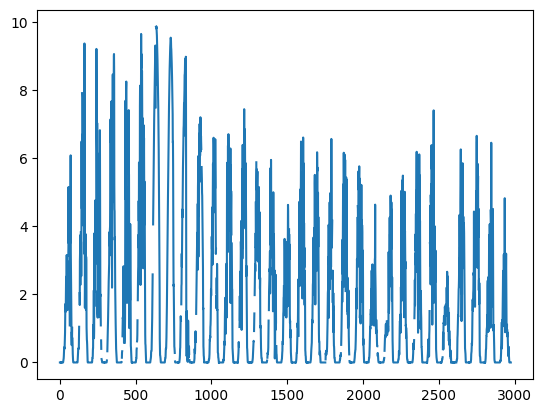

In [ ]:
df["2"].plot()
plt.show()

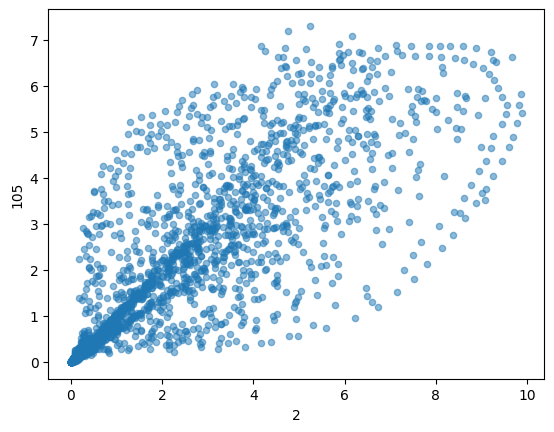

In [ ]:
df.plot.scatter(x="2", y="105", alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

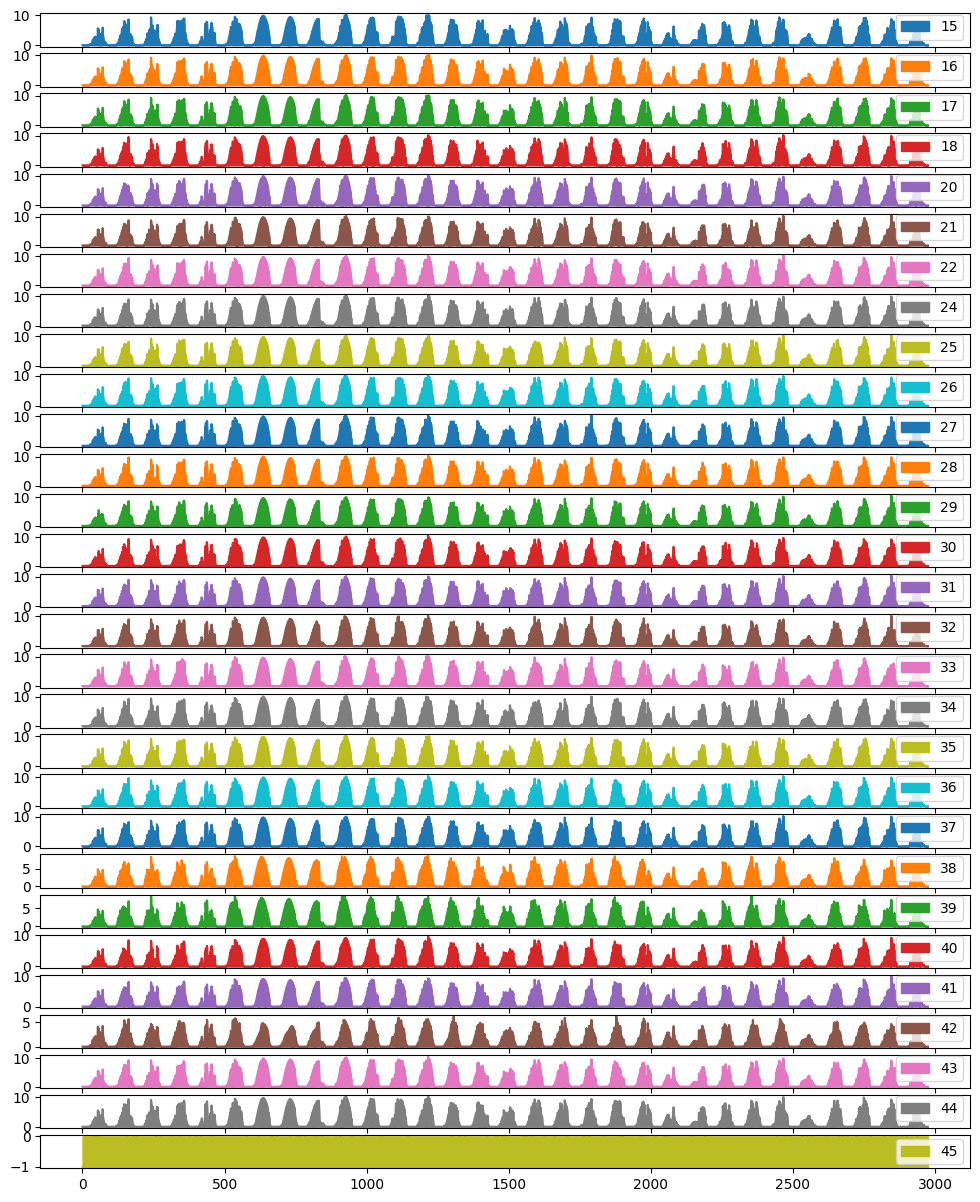

In [ ]:
axs = df.loc[:, "15":"45" ].plot.area(figsize=(12,15), subplots=True)
plt.show

##Handling NaNs, Zeros and -ve values

* Drop those columns with nans, -ve and zero values
* For the columns with mixed values of +ve and -ve, replace the -ve values with zeros since these are not correct values; Replacing with outliers also make sense as it would be counted in anomaly list but it will move the median in the box plot. So if this not a problem, we can replace it with the last value of IQR range for that particular column

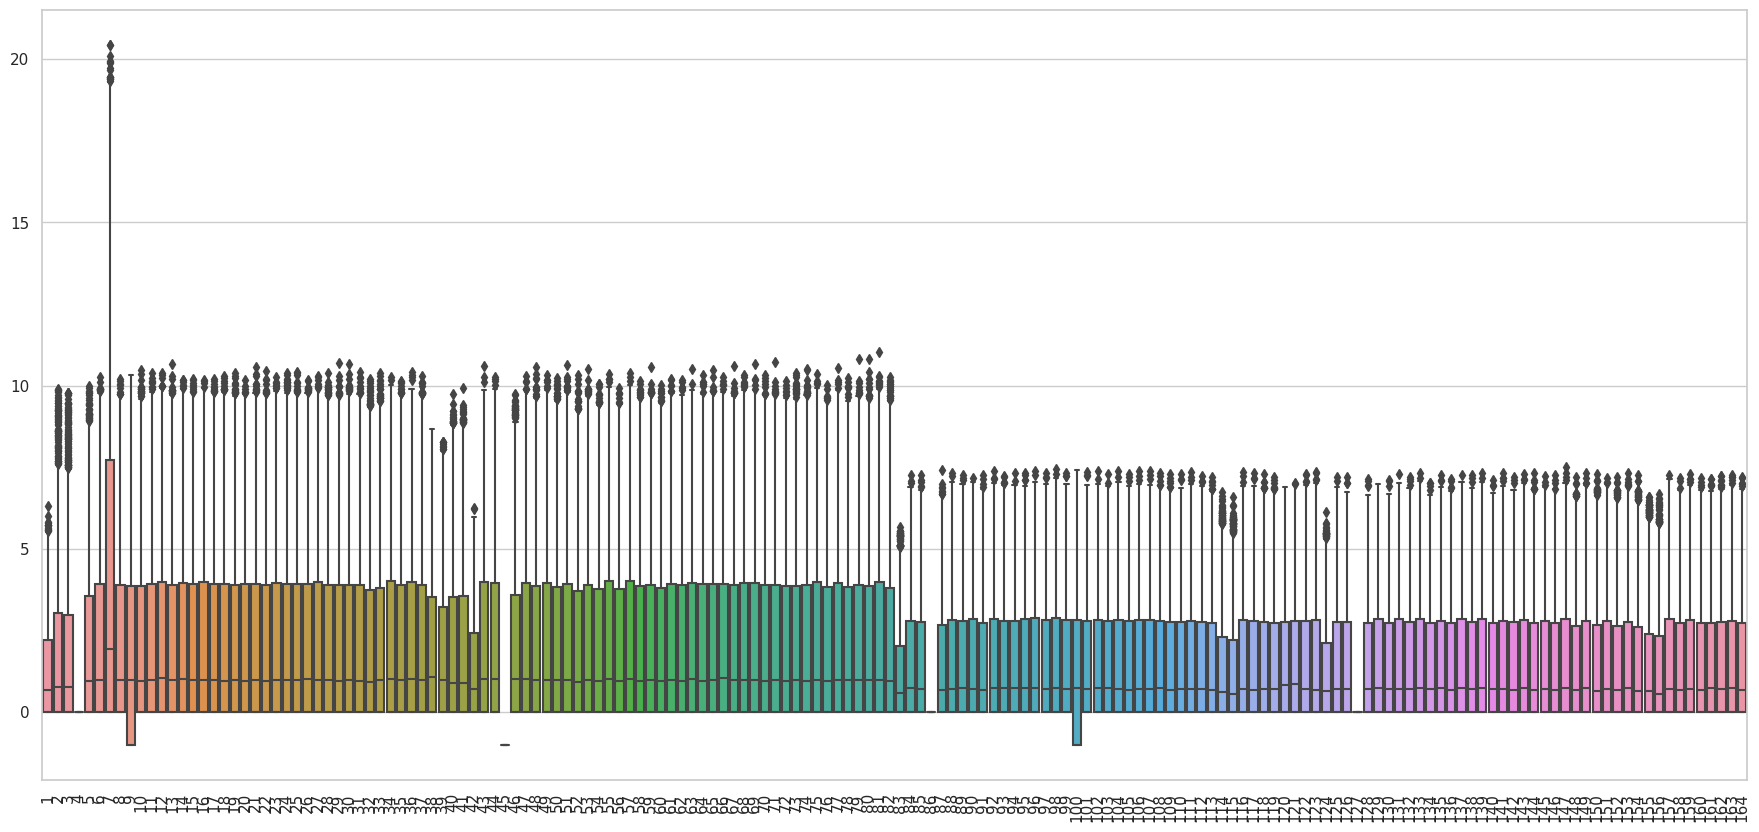

In [ ]:
df_copy = df.copy()
# for col in df.iloc[:,1:].columns:
#   if df_copy[col].dtype == 'object':
#         df_copy[col] = df_copy[col].str.replace(',', '.').astype(float)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(22,10))

# Draw a boxplot for each column
sns.boxplot(data=df_copy.drop(columns=["Datum"]))

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head()

,Datum,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_copy.drop(columns="Datum", inplace=True)

In [ ]:
df_copy.replace('NaN', np.nan, inplace=True)

In [ ]:
# Drop the date column for our calculations
df_without_date = df_copy.copy()

# 1. Columns that contain only NaNs or zeros
only_nans_or_zeros = df_without_date.columns[(df_without_date.isna() | (df_without_date == 0)).all(axis=0)]

# 2. Columns that contain only negative values
only_negative = df_without_date.columns[(df_without_date.isna() | (df_without_date < 0)).all(axis=0)]

# 3. Columns that contain both positive and negative values
mixed_values = df_without_date.columns[df_without_date.apply(lambda col: (col < 0).any() and (col > 0).any())]

print(f"Columns with only NaNs or zeros: {only_nans_or_zeros.tolist()}")
print(f"Columns with only negative values: {only_negative.tolist()}")
print(f"Columns with mixed positive and negative values: {mixed_values.tolist()}")


Columns with only NaNs or zeros: ['4', '86', '127']
Columns with only negative values: ['45']
Columns with mixed positive and negative values: ['9', '100']


In [ ]:
only_nans_or_zeros = only_nans_or_zeros.tolist()
only_negative = only_negative.tolist()

In [ ]:
# for i in (only_nans_or_zeros,only_negative):
df_without_date.drop(columns=only_nans_or_zeros + only_negative, inplace=True)

In [ ]:
# Check if all not required columns are handled
if only_nans_or_zeros + only_negative in list(df_without_date.columns):
  print(True)

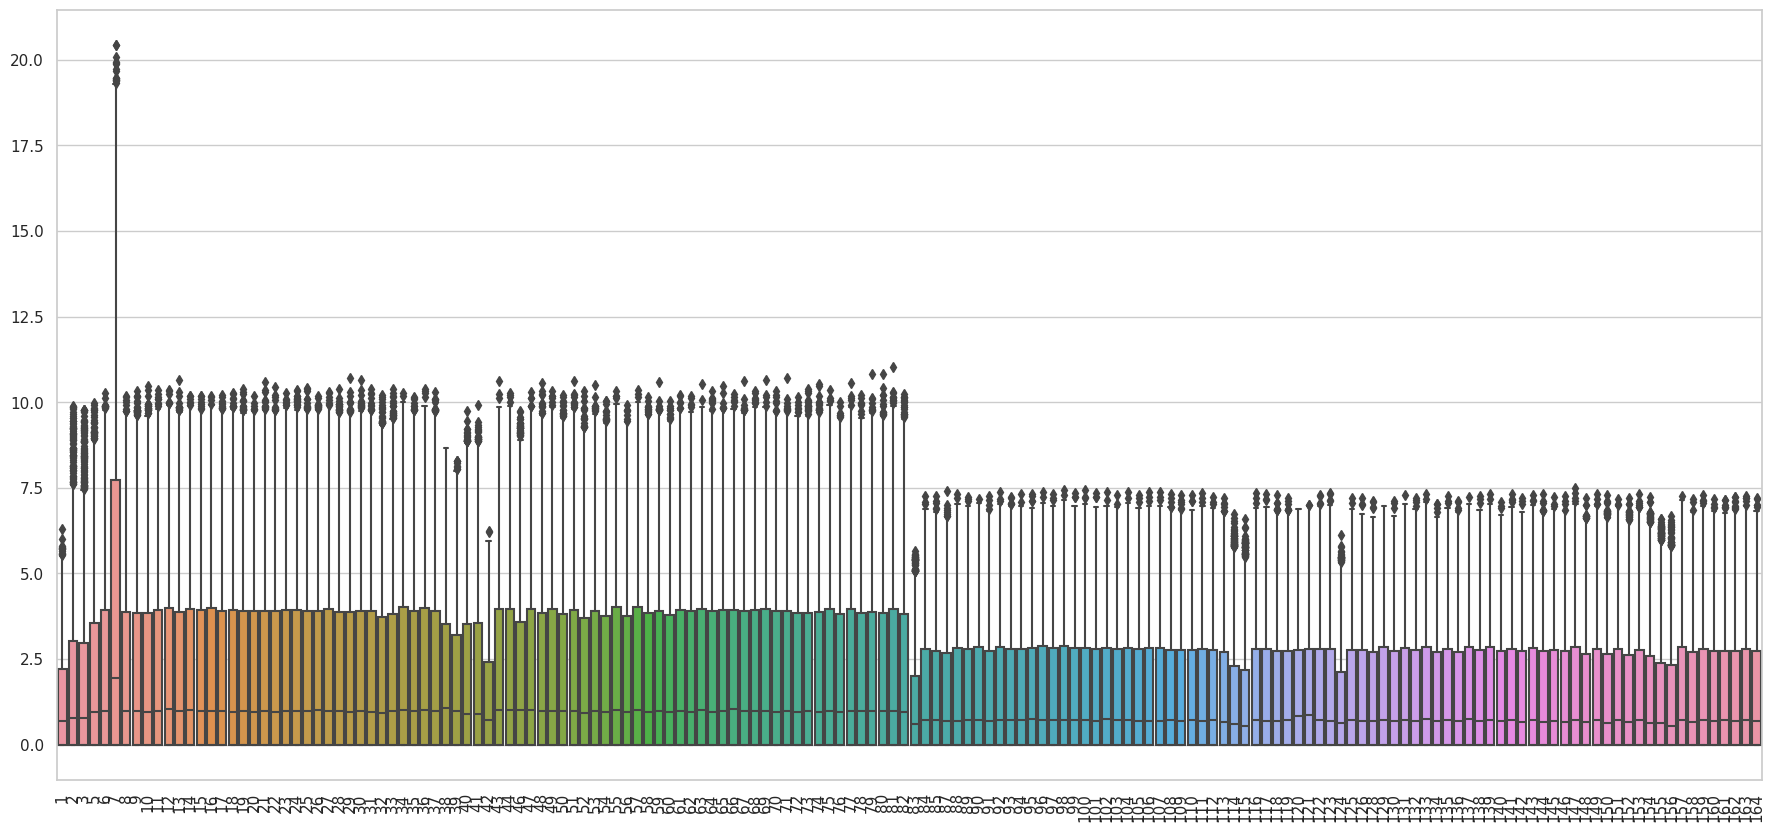

In [ ]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(22,10))

# Draw a boxplot for each column
# sns.boxplot(data=df_copy.drop(columns=["Datum"]))
sns.boxplot(data=df_without_date)

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
df_datum = df[['Datum']]
df_copy = pd.concat([df_datum, df_without_date], axis=1)

In [ ]:
df_copy["Datum"] = pd.to_datetime(df_copy["Datum"])

In [ ]:
df_copy.head()

,Datum,1,2,3,5,6,7,8,9,10,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Columns: 161 entries, Datum to 164
dtypes: datetime64[ns](1), float64(160)
memory usage: 3.7 MB


###Handling NaNs

Missing Values, how to handle:

* Option 1: Fill NaN with **Outlier or Zero**
In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive.

* Option 2: Fill NaN with **Mean** Value
Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

* Option 3: Fill NaN with Last Value with **.ffill()**
Filling NaNs with the last value could be bit better.

* Option 4: Fill NaN with Linearly Interpolated Value with **.interpolate()**
Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

In [ ]:
# df_nan = df.copy()
df_nan = df_copy.copy()

In [ ]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Columns: 161 entries, Datum to 164
dtypes: datetime64[ns](1), float64(160)
memory usage: 3.7 MB


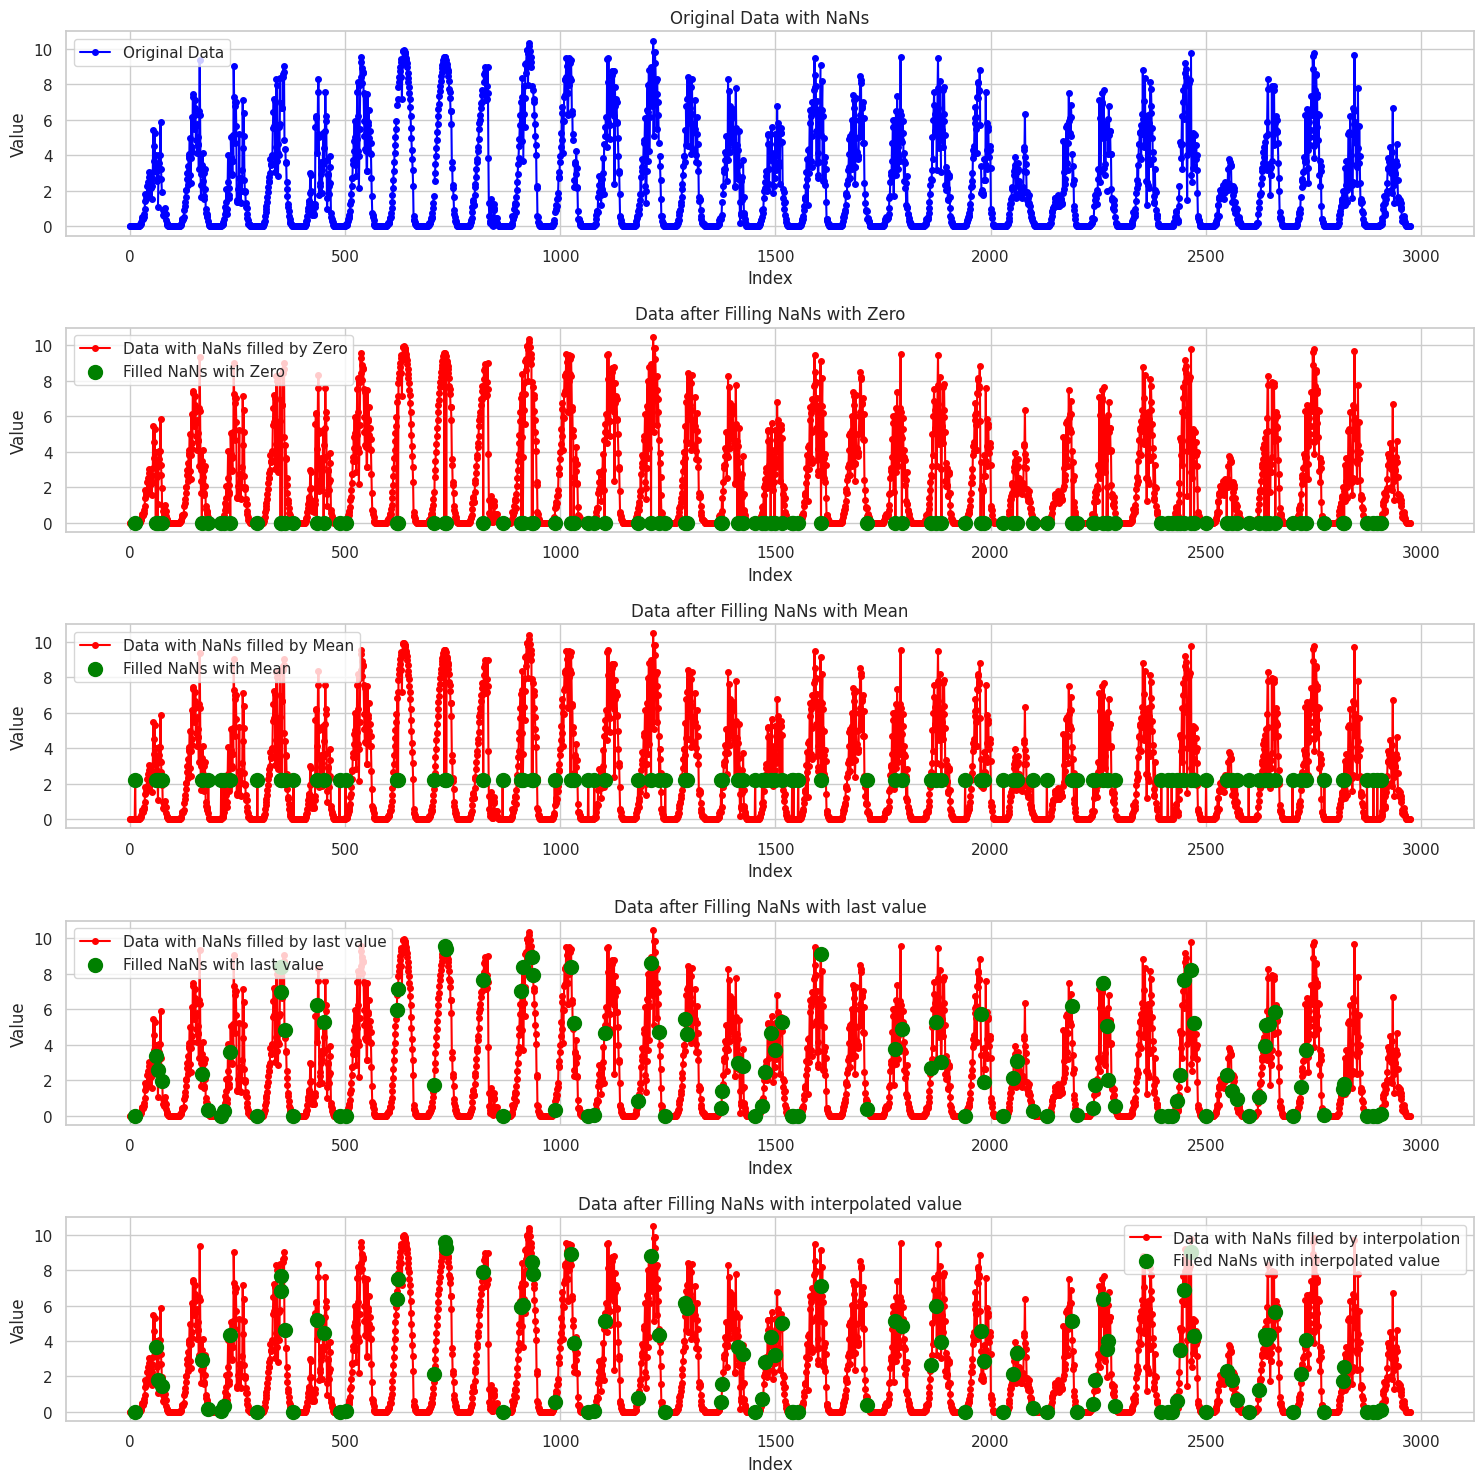

In [ ]:
import matplotlib.pyplot as plt

# Assuming the data needs preprocessing (removing commas and converting to float)
# if df["1"].dtype == 'object':
#     df["1"] = df["1"].str.replace(',', '.').astype(float)
subsytem = "10"
# Calculate the mean without considering the NaN values
mean_val = df_nan[subsytem].mean()
ffill_val = df_nan[subsytem].ffill()
iptl = df_nan[subsytem].interpolate()


# Create a copy of the column where NaNs are replaced with the mean value
# filled_col = df["1"].fillna(mean_val)


fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))

# Plotting the original data (with NaNs) on the first subplot
axs[0].plot(df_nan.index, df_nan[subsytem], label="Original Data", color='blue', marker='o', markersize=4)
axs[0].set_title("Original Data with NaNs")
axs[0].set_xlabel("Index")
axs[0].set_ylabel("Value")
axs[0].grid(True)
axs[0].legend()

# ----------

# Plotting the data with NaNs filled with mean value on the second subplot
filled_col = df_nan[subsytem].fillna(0)
axs[1].plot(df_nan.index, filled_col, label="Data with NaNs filled by Zero", color='red', marker='o', markersize=4)

# Highlighting NaN positions on the second subplot
nan_positions = df_nan[subsytem].isna()
axs[1].scatter(df_nan.index[nan_positions], filled_col[nan_positions], color='green', s=100, zorder=5, label="Filled NaNs with Zero")

axs[1].set_title("Data after Filling NaNs with Zero")
axs[1].set_xlabel("Index")
axs[1].set_ylabel("Value")
axs[1].grid(True)
axs[1].legend()

# ----------

# Plotting the data with NaNs filled with mean value on the third subplot
filled_col = df_nan[subsytem].fillna(mean_val)
axs[2].plot(df_nan.index, filled_col, label="Data with NaNs filled by Mean", color='red', marker='o', markersize=4)

# Highlighting NaN positions on the second subplot
nan_positions = df_nan[subsytem].isna()
axs[2].scatter(df.index[nan_positions], filled_col[nan_positions], color='green', s=100, zorder=5, label="Filled NaNs with Mean")

axs[2].set_title("Data after Filling NaNs with Mean")
axs[2].set_xlabel("Index")
axs[2].set_ylabel("Value")
axs[2].grid(True)
axs[2].legend()

# ----------

# Plotting the data with NaNs filled with mean value on the fourth subplot
filled_col = df_nan[subsytem].fillna(ffill_val)
axs[3].plot(df_nan.index, filled_col, label="Data with NaNs filled by last value", color='red', marker='o', markersize=4)

# Highlighting NaN positions on the second subplot
nan_positions = df_nan[subsytem].isna()
axs[3].scatter(df_nan.index[nan_positions], filled_col[nan_positions], color='green', s=100, zorder=5, label="Filled NaNs with last value")

axs[3].set_title("Data after Filling NaNs with last value")
axs[3].set_xlabel("Index")
axs[3].set_ylabel("Value")
axs[3].grid(True)
axs[3].legend()

# ----------

# Plotting the data with NaNs filled with mean value on the fifth subplot
filled_col = df_nan[subsytem].fillna(iptl)
axs[4].plot(df_nan.index, filled_col, label="Data with NaNs filled by interpolation", color='red', marker='o', markersize=4)

# Highlighting NaN positions on the second subplot
nan_positions = df_nan[subsytem].isna()
axs[4].scatter(df_nan.index[nan_positions], filled_col[nan_positions], color='green', s=100, zorder=5, label="Filled NaNs with interpolated value")

axs[4].set_title("Data after Filling NaNs with interpolated value")
axs[4].set_xlabel("Index")
axs[4].set_ylabel("Value")
axs[4].grid(True)
axs[4].legend()

# ----------

plt.tight_layout()
plt.show()


In [ ]:
# !pip install --upgrade pandas

In [ ]:
df_nan.duplicated().sum()

0

In [ ]:
# df_nan = df_nan.apply(lambda col: col.interpolate(method='linear'))
# df_nan.interpolate(method='linear', inplace=True)
df_new = df_nan.iloc[:, 1:]
for col in df_new.columns:
  df_nan[col].interpolate(method='linear', inplace=True)
  if df_nan[col].isna().sum() > 0:
    df_nan[col].interpolate(method='bfill', inplace=True)


In [ ]:
for col in df_nan.columns:
  if df_nan[col].isna().sum() > 0:
    print(col, df_nan[col].isna().sum())

In [ ]:
df_copy = df_nan.copy()

###Outliers

Handling outliers is an essential step in the data preprocessing stage, especially when building machine learning or statistical models. The impact of outliers on the analysis results can be substantial; therefore, it's crucial to identify and address them appropriately. Here's a general approach to handling outliers:

1. **Identification**: Before we can address outliers, we need to detect them.
   - **Visualization**: Using scatter plots, box plots, and histograms to visually identify outliers.
   - **Statistical Measures**: Using the IQR (Interquartile Range), Z-score, or MAD (Median Absolute Deviation) to identify outliers in a quantitative manner.

2. **Determine the Cause**: Understanding why the outlier exists.
   - **Data Entry Error**: Incorrect data input.
   - **Measurement Error**: Error in measurement, which is common in sensor data.
   - **Natural Outlier**: A genuine, unusual observation.

3. **Decide on Treatment**:
   - **Removal**: Remove outliers if they are due to data entry or measurement errors.
   - **Transformation**: Apply logarithmic or square root transformations to reduce the impact of outliers. This works best for right-skewed data.
   - **Binning**: Convert continuous data into intervals, which can diminish the effect of outliers.
   - **Imputation**: Replace outliers with statistical measures like median or mean (preferably median, as it's more robust to outliers).
   - **Cap/Floor**: Set a threshold to cap or floor the values. For instance, any value above the 99th percentile can be set to the value of the 99th percentile.
   - **Keep**: In some cases, it might be meaningful to keep the outliers, especially if those outliers carry significant business implications or if the goal is to detect anomalies.

4. **Models Robust to Outliers**:
   - Some algorithms are robust to outliers (e.g., tree-based algorithms like Decision Trees and Random Forest). If the data inherently contains outliers and if we believe they shouldn't be removed, we can consider using these algorithms.
   - Regression problems can use robust regression techniques that are less sensitive to outliers.
  
5. **Cross-Validation**: If we're building a predictive model, consider doing cross-validation. Use training sets with and without outliers and compare the model's performance on a validation set. This can help us decide if keeping/removing outliers is beneficial.

6. **Domain Knowledge**: Often, understanding the domain can provide insight into whether a value should be considered an outlier. For instance, a heart rate of 400 beats per minute in human data is most likely an error, but domain knowledge is required to make that judgment.

Remember, outliers are not inherently "bad." They can represent valuable information or can be a result of noise or errors. The decision on how to handle outliers should be based on the cause of the outlier, the purpose of the analysis, and the potential impact on the results.

In [ ]:
def find_outliers(column):

    # Calculate the IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    normal = column[(column >= lower_bound) & (column <= upper_bound)]
    outlier = column[(column < lower_bound) | (column > upper_bound)]
    return normal, outlier



In [ ]:
def plot_data(normals, outliers, col_name):
    plt.figure(figsize=(10,6))
    plt.scatter(normals.index, normals, color='blue', label='Normal Points')
    if not outliers.empty:
        plt.scatter(outliers.index, outliers, color='red', label='Outliers')
    plt.legend()
    plt.title(f"Normal Points vs Outliers for {col_name}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

In [ ]:
outliers = {}
normals = {}

for col in df_copy.columns:
    if col != "Datum":
      normals_in_col, outliers_in_col = find_outliers(df_copy[col])
      if not outliers_in_col.empty:
          outliers[col] = outliers_in_col
      if not normals_in_col.empty:
          normals[col] = normals_in_col
      # plot_data(normals[col], outliers[col], col)

In [ ]:
# print(outliers)
# list_outliers = outliers["151"]
outliers["34"]
# normals["34"]

927    10.17
928    10.27
Name: 34, dtype: float64

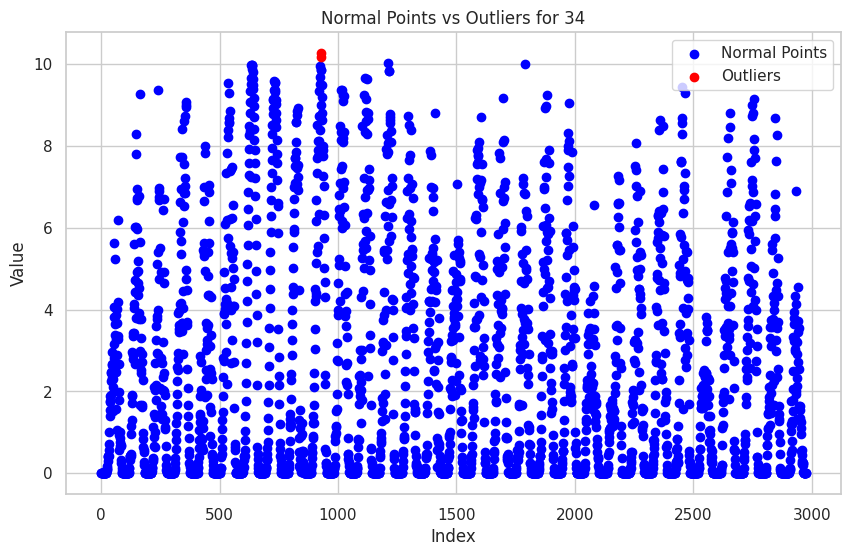

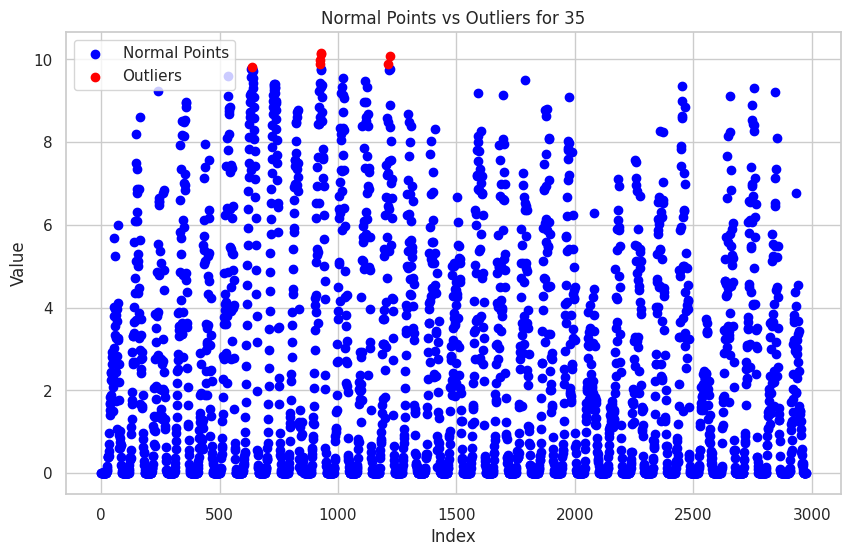

In [ ]:
for col in df_copy.iloc[:,33:35].columns:
    # print(col)
    if col != "Datum":
      plot_data(normals[col], outliers[col], col)


In [ ]:
# len(outliers["2"].tolist())
outliers_plot = {}
for k, v in outliers.items():
  outliers_plot[k] = len(outliers[k].tolist())

In [ ]:
# Create a DataFrame with scalar values and an index
df_outliers = pd.DataFrame.from_dict(outliers_plot, orient='index', columns=['Count'])

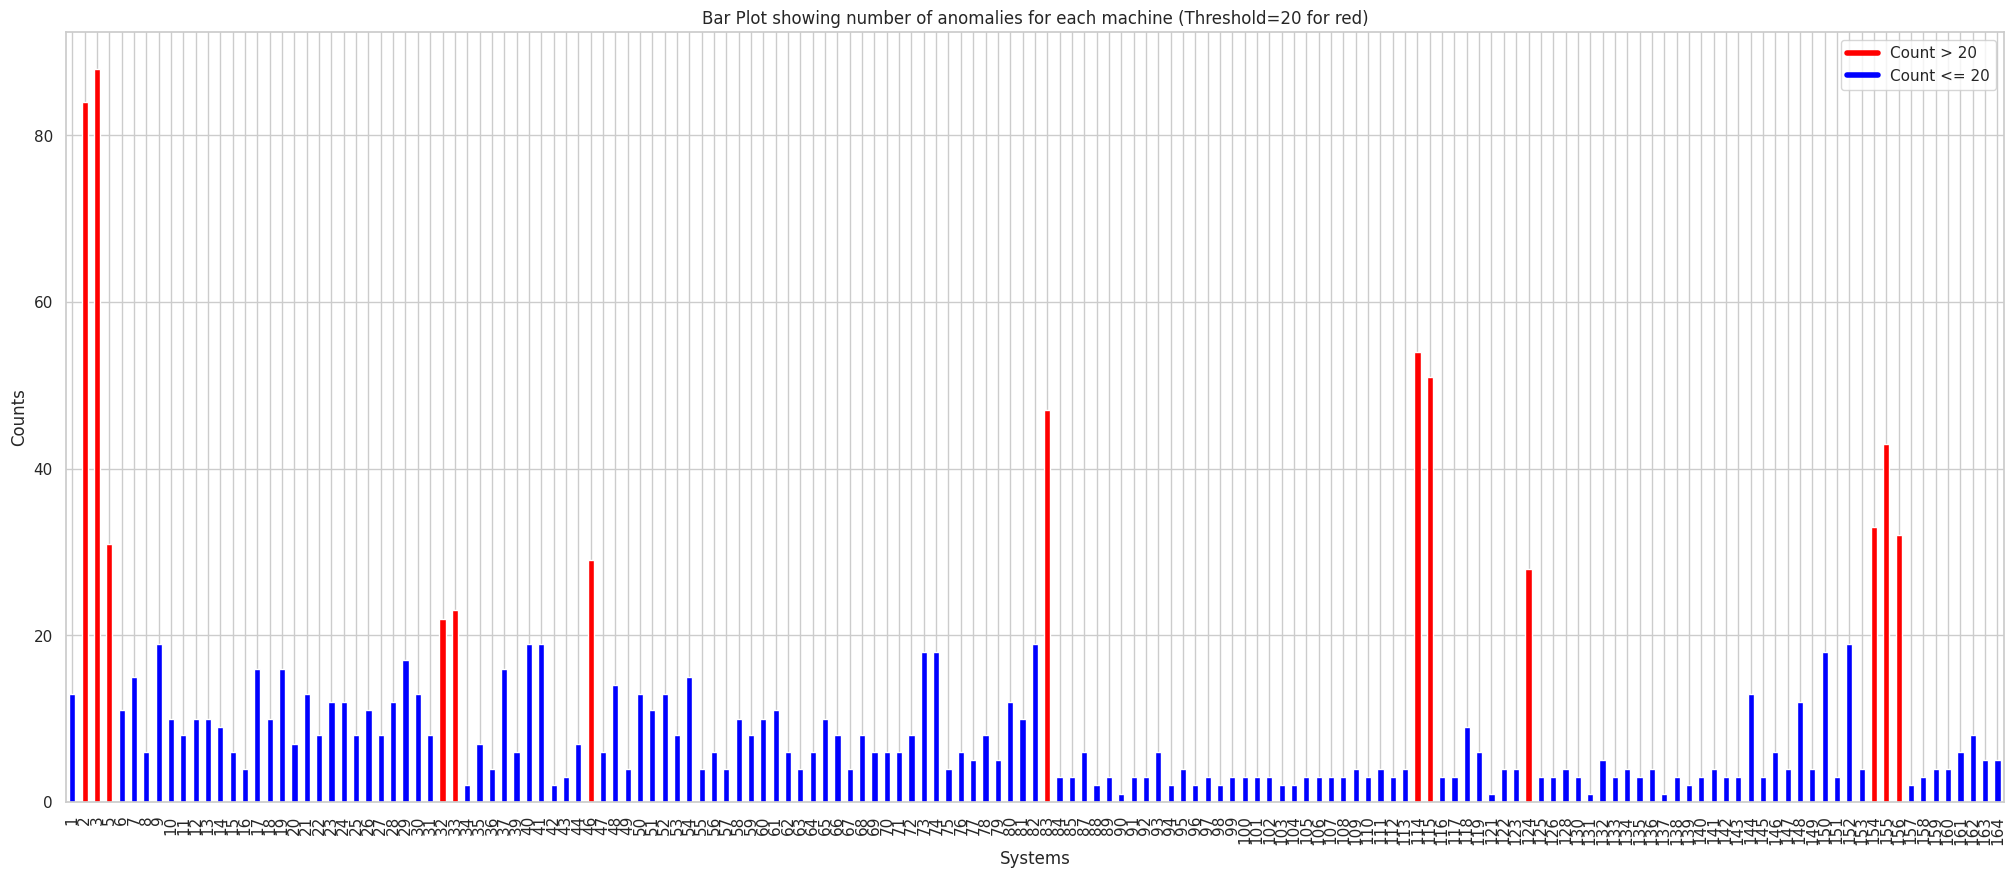

In [ ]:
# Set a threshold value
threshold = 20

# Create a list of colors based on the threshold
colors = ['red' if count > threshold else 'blue' for count in df_outliers['Count']]

# Create a bar plot with different colors for bars exceeding the threshold
ax = df_outliers['Count'].plot(kind='bar', figsize=(25,10), color=colors)
plt.xlabel('Systems')
plt.ylabel('Counts')
plt.title(f'Bar Plot showing number of anomalies for each machine (Threshold={threshold} for red)')
plt.legend().set_visible(False)

from matplotlib.lines import Line2D
custom_legend = [Line2D([0], [0], color='red', lw=4, label=f'Count > {threshold}'),
                 Line2D([0], [0], color='blue', lw=4, label=f'Count <= {threshold}')]
ax.legend(handles=custom_legend)

# Show the plot
plt.show()

In [ ]:
anomalies_threshold = {}
for k,v in outliers.items():
  anomalies_threshold[k] = math.floor(min(outliers[k].tolist()))

In [ ]:
anomalies_threshold['51'], outliers['51']

(9,
 634     10.00
 635      9.97
 636      9.99
 637      9.95
 638      9.86
 923      9.92
 927     10.25
 928     10.14
 929      9.87
 1216    10.63
 2466    10.21
 Name: 51, dtype: float64)

In [ ]:
#  Lowest and highest anomaly value
min(anomalies_threshold.values()), max(anomalies_threshold.values())

(5, 19)

In [ ]:
# # Plot to see values attained by anomalies
# index_labels = anomalies_threshold.keys()
# df_anomalies = pd.DataFrame(anomalies_threshold, index=index_labels)
# # df_anomalies = pd.DataFrame(anomalies_threshold, orient='index', columns=['Count'])
# df_anomalies.plot(figsize=(25,20), legend=True)
# plt.show()

In [ ]:
df_copy.head()

,Datum,1,2,3,5,6,7,8,9,10,...,155,156,157,158,159,160,161,162,163,164
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-07 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(anomalies_threshold.keys())

157

In [ ]:
A = set([str(i) for i in range(1,165)])
B = set(anomalies_threshold.keys())
C = list(A - B)
D = only_nans_or_zeros + only_negative

for i in C:
  if i in D:
    C.remove(i)


In [ ]:
set(C) -set(D)

{'120', '129', '38'}

**Observation**:

* Not all systems have anomalies as we can see from the length of anomalies_threshold above which is 157. There systems which dont have anomalies- '120', '129' and '38'.

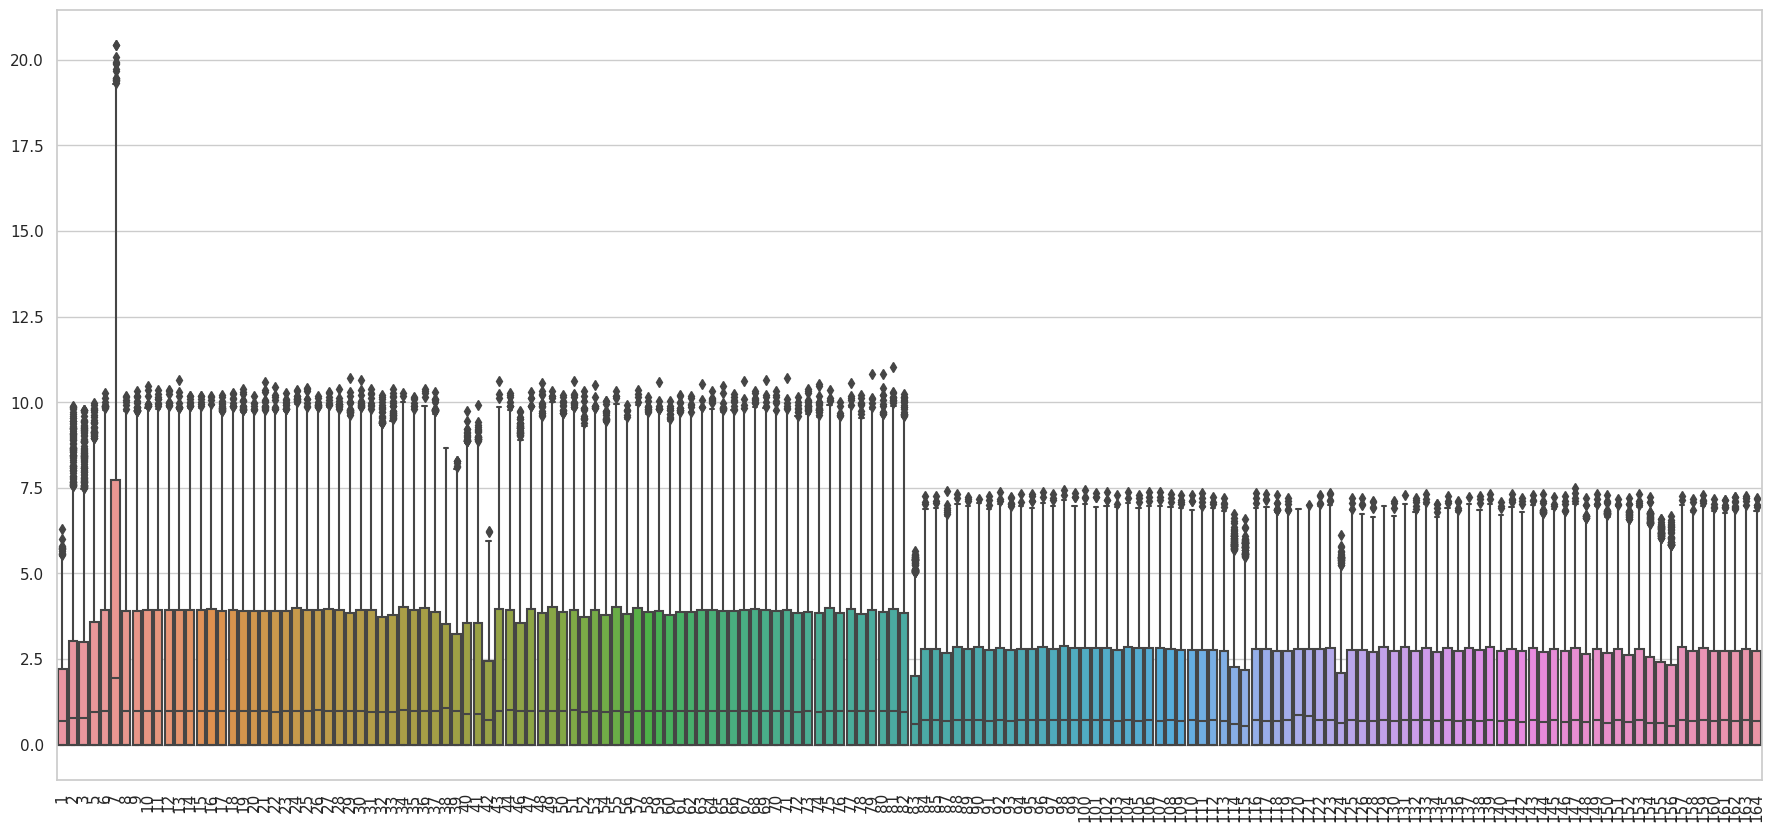

In [ ]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(22,10))

# Draw a boxplot for each column
# sns.boxplot(data=df_copy.drop(columns=["Datum"]))
sns.boxplot(data=df_copy)

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



---



###Feature Engineering



In [ ]:
new_features = ['hour_of_day', 'day_of_week', 'quarter_of_hour', 'week_number', 'is_weekend']

In [ ]:
import datetime
# Extracting the features
df_copy['hour_of_day'] = df_copy['Datum'].dt.hour
df_copy['day_of_week'] = df_copy['Datum'].dt.day_name()

# Determine the quarter of the hour
df_copy['quarter_of_hour'] = ((df_copy['Datum'].dt.minute) // 15) + 1

In [ ]:
df_copy['date_only'] = df_copy['Datum'].dt.date
mask_wrong_month = df_copy['date_only'].apply(lambda x: x.month) != 7

df_copy.loc[mask_wrong_month, 'date_only'] = df_copy[mask_wrong_month]['date_only'].apply(lambda x: datetime.date(2023, 7, x.day))
df_copy["date_only"] = pd.to_datetime(df_copy["date_only"])
df_copy['week_number'] = df_copy['date_only'].dt.isocalendar().week

print(df_copy['week_number'].unique())
print(df_copy['date_only'].unique())


<IntegerArray>
[27, 28, 29, 30, 31]
Length: 5, dtype: UInt32
['2023-07-07T00:00:00.000000000' '2023-07-13T00:00:00.000000000'
 '2023-07-14T00:00:00.000000000' '2023-07-15T00:00:00.000000000'
 '2023-07-16T00:00:00.000000000' '2023-07-17T00:00:00.000000000'
 '2023-07-18T00:00:00.000000000' '2023-07-19T00:00:00.000000000'
 '2023-07-20T00:00:00.000000000' '2023-07-21T00:00:00.000000000'
 '2023-07-22T00:00:00.000000000' '2023-07-23T00:00:00.000000000'
 '2023-07-24T00:00:00.000000000' '2023-07-25T00:00:00.000000000'
 '2023-07-26T00:00:00.000000000' '2023-07-27T00:00:00.000000000'
 '2023-07-28T00:00:00.000000000' '2023-07-29T00:00:00.000000000'
 '2023-07-30T00:00:00.000000000' '2023-07-31T00:00:00.000000000']


In [ ]:
df_copy['is_weekend'] = df_copy['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

In [ ]:
df_copy.head()

,Datum,1,2,3,5,6,7,8,9,10,...,161,162,163,164,hour_of_day,day_of_week,quarter_of_hour,date_only,week_number,is_weekend
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Saturday,1,2023-07-07,27,1
1,2023-01-07 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Saturday,2,2023-07-07,27,1
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Saturday,3,2023-07-07,27,1
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,Saturday,4,2023-07-07,27,1
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,Saturday,1,2023-07-07,27,1


In [ ]:
df_copy.drop(columns="date_only", inplace=True)

In [ ]:
df_copy.head()

,Datum,1,2,3,5,6,7,8,9,10,...,160,161,162,163,164,hour_of_day,day_of_week,quarter_of_hour,week_number,is_weekend
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,1,27,1
1,2023-01-07 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,2,27,1
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,3,27,1
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,4,27,1
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,Saturday,1,27,1


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Initialize an empty DataFrame to store counts of outliers for each subsystem during each quarter of the hour
# outliers_count_df = pd.DataFrame(index=range(0, 60, 15), columns=df_copy.columns.drop("Datum", new_features))

# # Populate the DataFrame
# for col in outliers:
#     for quarter in range(0, 60, 15):
#         mask = (df_copy["quarter_of_hour"] == quarter) & (df_copy.index.isin(outliers[col].index))
#         outliers_count_df.at[quarter, col] = df_copy[mask].shape[0]

# # Convert the outlier counts to integer type
# outliers_count_df = outliers_count_df.fillna(0).astype(int)

# # Plot
# plt.figure(figsize=(15, 10))
# outliers_count_df.plot(kind='bar', ax=plt.gca(), legend=False)
# plt.title("Number of Outliers per Quarter of an Hour for Each Subsystem")
# plt.ylabel("Number of Outliers")
# plt.xlabel("Quarter of an Hour")
# plt.xticks(rotation=0)
# # plt.legend(title="Subsystem")
# plt.tight_layout()
# plt.show()


In [ ]:
df_copy.head()

,Datum,1,2,3,5,6,7,8,9,10,...,160,161,162,163,164,hour_of_day,day_of_week,quarter_of_hour,week_number,is_weekend
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,1,27,1
1,2023-01-07 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,2,27,1
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,3,27,1
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,4,27,1
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,Saturday,1,27,1


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df is the name of your DataFrame and it's indexed by the 'Datum' column
# # If not indexed by 'Datum', first set it:
# df_new = df_copy.copy()
# df_new.set_index('Datum', inplace=True)

# # Choose a subsystem for visualization
# subsystem_series = df_new['1']

# # Compute the rolling average with a window of 96 (24 hours x 4 intervals/hour)
# rolling_avg = subsystem_series.rolling(window=96).mean()

# plt.figure(figsize=(15, 7))
# subsystem_series.plot(label='Actual Values')
# rolling_avg.plot(label='24-Hour Rolling Average', linestyle='--', color='red')
# plt.title('Time Series Visualization of Subsystem "1" with 24-Hour Rolling Average')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.tight_layout()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib.dates as mdates

# # Assuming df is the name of your DataFrame and it's indexed by the 'Datum' column
# # If not indexed by 'Datum', first set it:
# df_new = df_copy.copy()
# df_new.set_index('Datum', inplace=True)

# # Choose a subsystem for visualization
# subsystem_series = df_new['10'][:100]

# # Compute the rolling average with a window of 96 (24 hours x 4 intervals/hour)
# rolling_avg = subsystem_series.rolling(window=96).mean()

# # Plotting
# fig, ax = plt.subplots(figsize=(30, 7))

# subsystem_series.plot(label='Actual Values', ax=ax)
# rolling_avg.plot(label='24-Hour Rolling Average', linestyle='--', color='red', ax=ax)

# # Adjusting the date format for better clarity
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d-%h-%m-%s'))

# plt.setp(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better clarity

# plt.title('Time Series Visualization of Subsystem "1" with 24-Hour Rolling Average')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.tight_layout()
# plt.show()


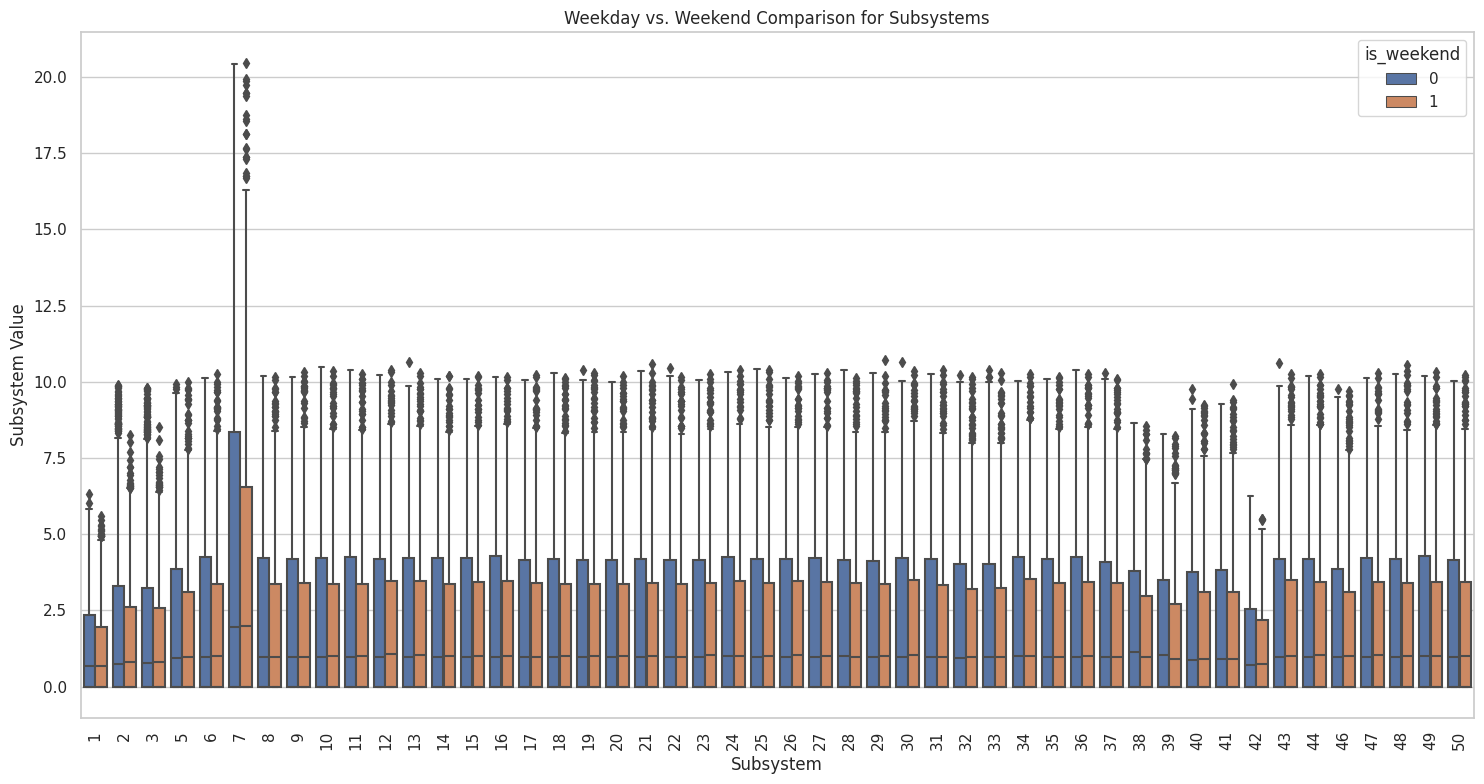

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the name of your DataFrame
# Melt the dataframe to long format for easier plotting
df_melted = df_copy.drop(columns="Datum")
df_melted = df_copy.melt(id_vars='is_weekend', value_vars=df_melted.columns[:-117], var_name='Subsystem', value_name="Value")
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

# Create a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Subsystem', y='Value', hue='is_weekend', data=df_melted)
plt.title('Weekday vs. Weekend Comparison for Subsystems')
plt.xlabel('Subsystem')
plt.ylabel('Subsystem Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
df_copy.head()

,Datum,1,2,3,5,6,7,8,9,10,...,160,161,162,163,164,hour_of_day,day_of_week,quarter_of_hour,week_number,is_weekend
0,2023-01-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,1,27,1
1,2023-01-07 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,2,27,1
2,2023-01-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,3,27,1
3,2023-01-07 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Saturday,4,27,1
4,2023-01-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,Saturday,1,27,1




---



In [ ]:
df_new = df_copy[df_copy['is_weekend']==0]

In [ ]:
df_new.shape

(2112, 166)

In [ ]:
df_new.drop(columns=new_features, inplace=True)

<ipython-input-118-c07f4f917f4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=new_features, inplace=True)


In [ ]:
df_new.head()

,Datum,1,2,3,5,6,7,8,9,10,...,155,156,157,158,159,160,161,162,163,164
96,2023-02-07 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,2023-02-07 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2023-02-07 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,2023-02-07 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,2023-02-07 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
outliers_weekday = {}
# normals = {}

for col in df_new.columns:
    if col != "Datum":
      normals_in_col, outliers_in_col = find_outliers(df_new[col])
      if not outliers_in_col.empty:
          outliers_weekday[col] = outliers_in_col
      # if not normals_in_col.empty:
      #     normals[col] = normals_in_col
      # plot_data(normals[col], outliers[col], col)

In [ ]:
len(outliers_weekday.keys())

33

**A it can be observed if we remove the weekend data, we have only 33 systems that show anomalies.**

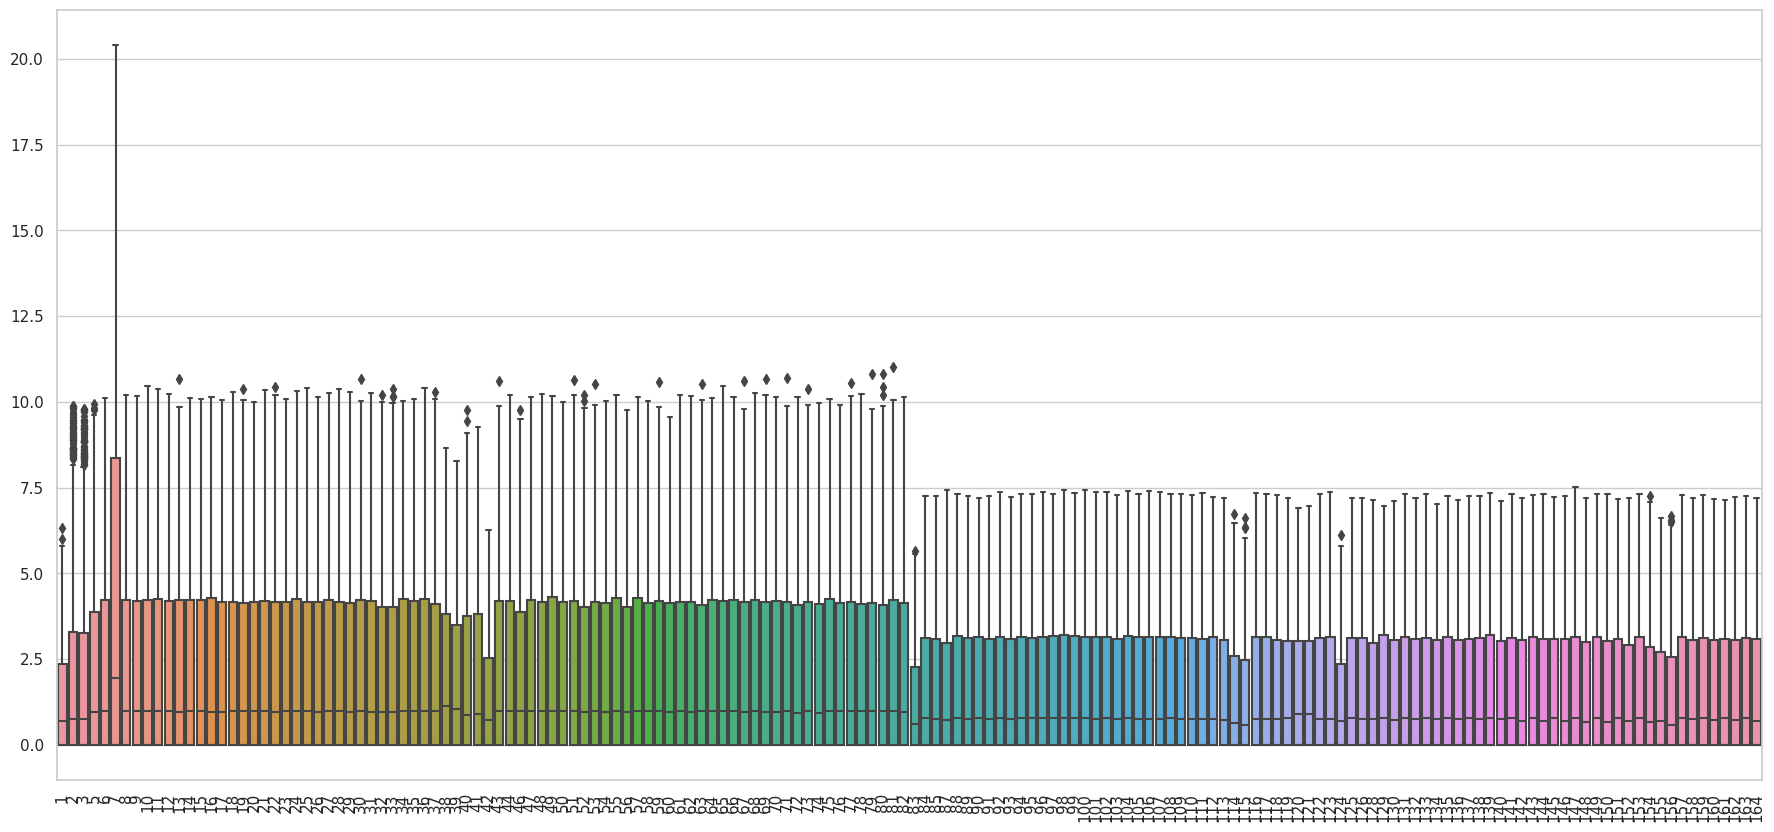

In [ ]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(22,10))

# Draw a boxplot for each column
# sns.boxplot(data=df_copy.drop(columns=["Datum"]))
sns.boxplot(data=df_new)

# Rotate x-labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df_copy contains a column 'quarter_of_hour' with values from 1 to 4 (1: 00-15min, 2: 15-30min, 3: 30-45min, 4: 45-60min)
# # If you don't have this, make sure to create this column first.

# # Counting the occurrences for each quarter
# quarter_counts = df_copy['quarter_of_hour'].value_counts().sort_index()

# # Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x=quarter_counts.index, y=quarter_counts.values, palette='viridis')

# # Setting the labels and title
# plt.xticks(ticks=[0,1,2,3], labels=['00-15min', '15-30min', '30-45min', '45-60min'])
# plt.xlabel('Quarter of Hour')
# plt.ylabel('Number of Data Points')
# plt.title('Distribution of Data Points Over Quarters of an Hour')
# plt.tight_layout()
# plt.show()


In [ ]:
# import numpy as np

# # Calculate the correlation matrix for the subsystems columns
# correlation_matrix = df_copy[df_copy.columns[:-125]].corr()

# # Create a heatmap
# plt.figure(figsize=(25, 14))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')

# # To make it aesthetically pleasing, mask the upper triangle (since it's redundant)
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True, fmt=".2f", square=True, linewidths=0.5, linecolor='black')

# plt.title('Subsystems Correlation Heatmap')
# plt.tight_layout()
# plt.show()


In [ ]:
# import numpy as np

# # Calculate the correlation matrix for the subsystems columns
# correlation_matrix = df_copy[df_copy.columns[:-125]].corr()

# # Create a heatmap
# plt.figure(figsize=(25, 14))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black')

# # To make it aesthetically pleasing, mask the upper triangle (since it's redundant)
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True, fmt=".2f", square=True, linewidths=0.5, linecolor='black')

# plt.title('Subsystems Correlation Heatmap')
# plt.tight_layout()
# plt.show()


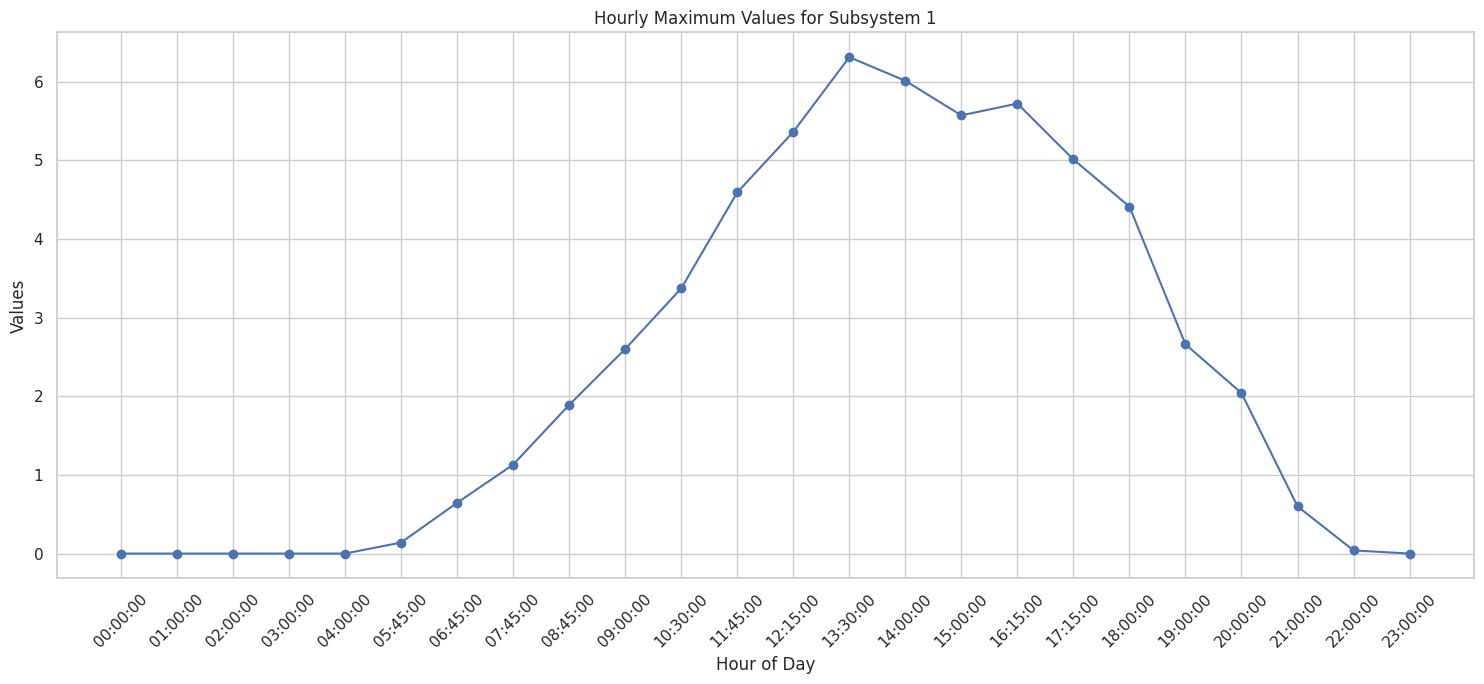

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose the subsystem you're interested in, for example '1'
subsystem = '1'

# Group by hour_of_day and get the maximum value within each hour for the subsystem
hourly_max = df_copy.groupby('hour_of_day')[subsystem].max()

# Find the timestamp where the max value occurred within each hour for the subsystem
hourly_max_timestamps = df_copy.loc[df_copy.groupby('hour_of_day')[subsystem].idxmax()]['Datum']

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))
hourly_max.plot(ax=ax, marker='o', linestyle='-')
ax.set_xticks(hourly_max.index)
ax.set_xticklabels(hourly_max_timestamps.dt.time, rotation=45)
ax.set_title(f"Hourly Maximum Values for Subsystem {subsystem}")
ax.set_ylabel("Values")
ax.set_xlabel("Hour of Day")
plt.tight_layout()
plt.show()


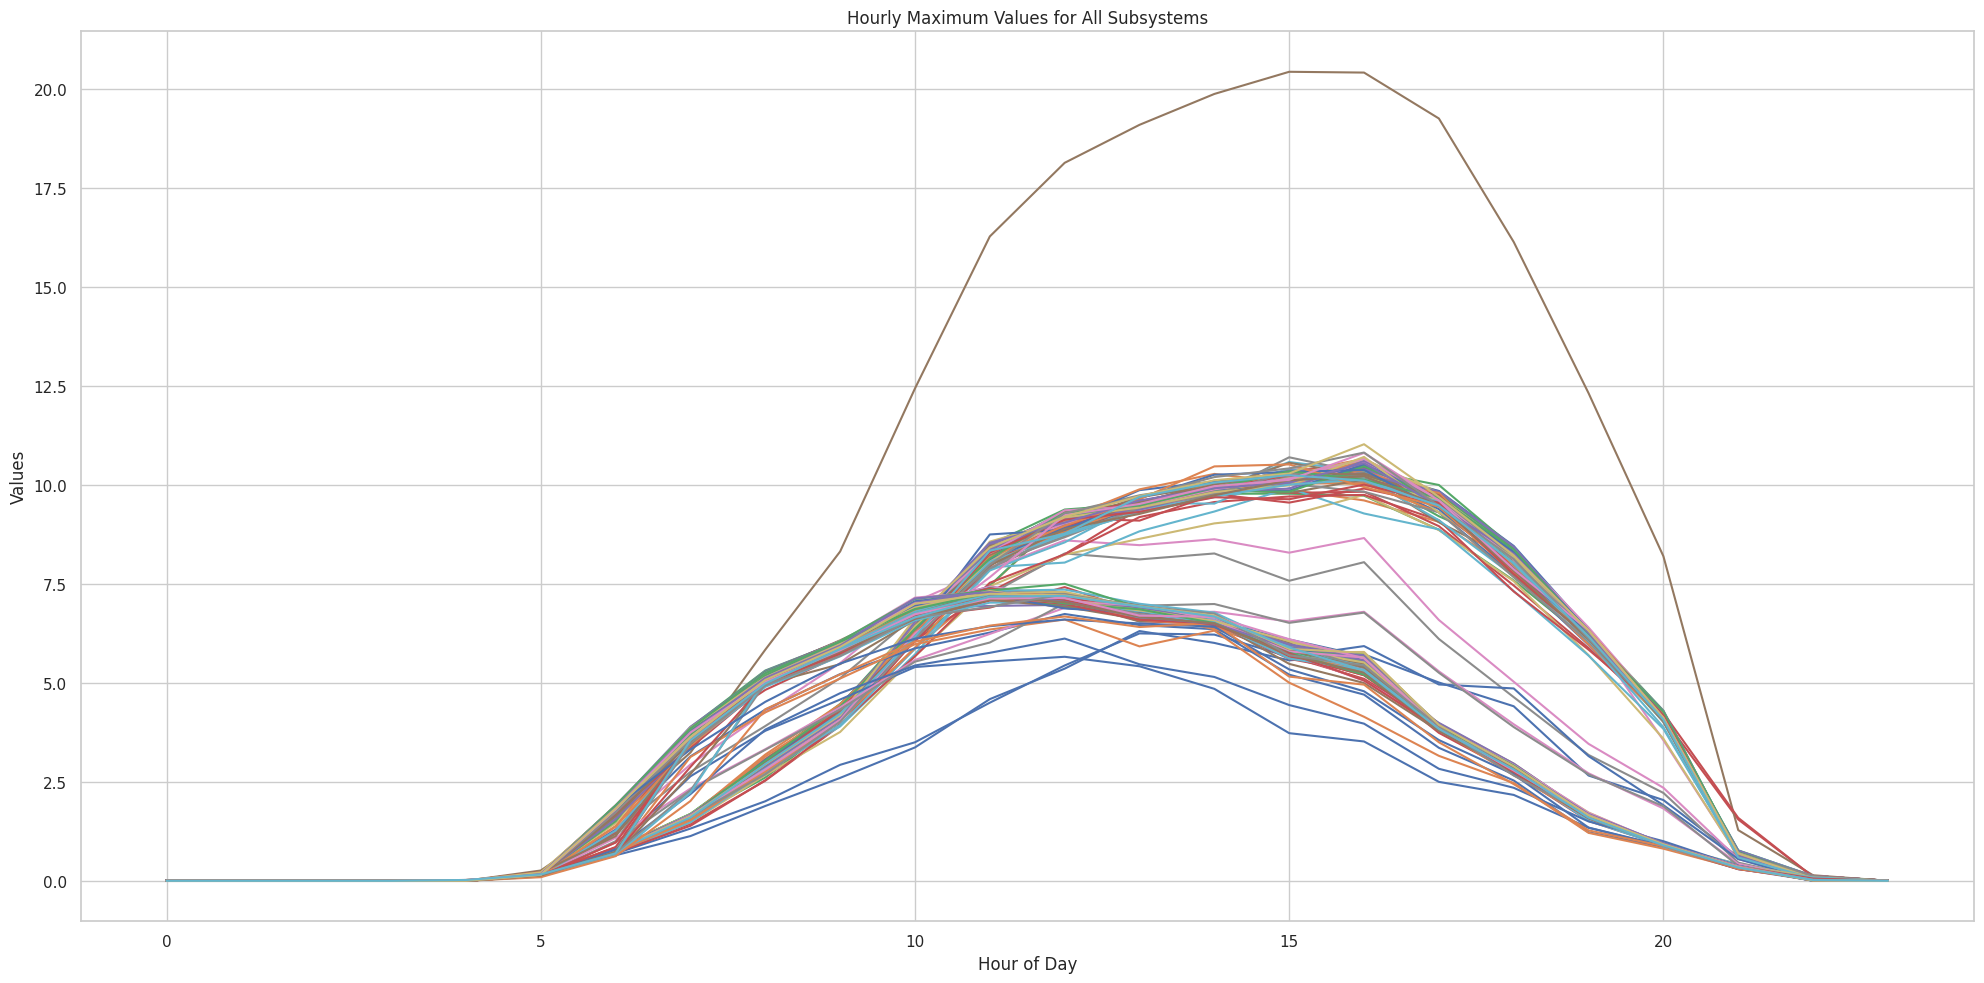

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of all subsystems
# subsystems = [str(i) for i in range(1, 165)]

subsystems_to_compare = list(map(str, range(1, 165))) #[1, 2, 3, 4, 5]  # Replace with the desired subsystem numbers
value_to_remove = only_nans_or_zeros + only_negative

subsystems = [i for i in subsystems_to_compare if i not in value_to_remove]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Loop through each subsystem
for subsystem in subsystems:
    # Group by hour_of_day and get the maximum value within each hour for the subsystem
    hourly_max = df_copy.groupby('hour_of_day')[subsystem].max()

    # Plot the hourly max values for each subsystem
    hourly_max.plot(ax=ax, label=f"Subsystem {subsystem}")

# Setting up the plot
ax.set_title("Hourly Maximum Values for All Subsystems")
ax.set_ylabel("Values")
ax.set_xlabel("Hour of Day")
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)
plt.tight_layout()
plt.show()


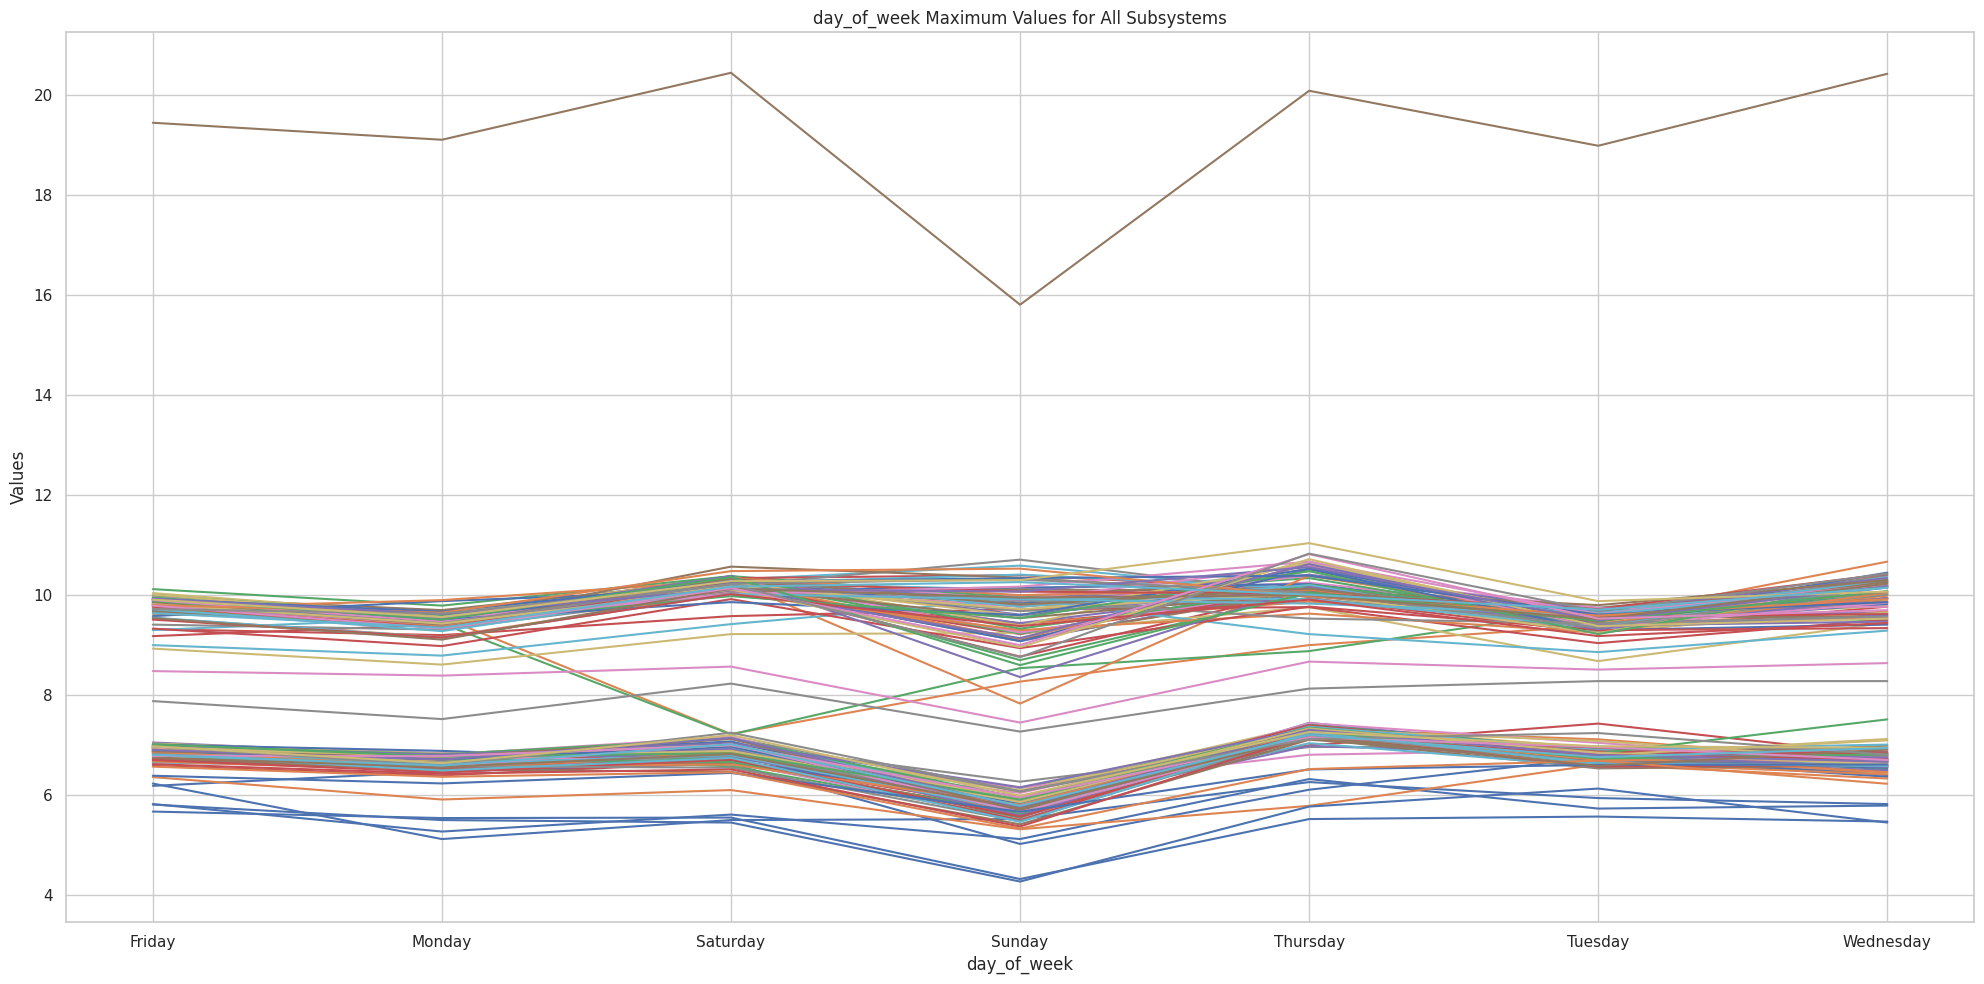

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of all subsystems
# subsystems = [str(i) for i in range(1, 165)]

subsystems_to_compare = list(map(str, range(1, 165))) #[1, 2, 3, 4, 5]  # Replace with the desired subsystem numbers
value_to_remove = only_nans_or_zeros + only_negative

subsystems = [i for i in subsystems_to_compare if i not in value_to_remove]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10))

# Loop through each subsystem
for subsystem in subsystems:
    # Group by hour_of_day and get the maximum value within each hour for the subsystem
    hourly_max = df_copy.groupby('day_of_week')[subsystem].max()

    # Plot the hourly max values for each subsystem
    hourly_max.plot(ax=ax, label=f"Subsystem {subsystem}")

# Setting up the plot
ax.set_title("day_of_week Maximum Values for All Subsystems")
ax.set_ylabel("Values")
ax.set_xlabel("day_of_week")
# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)
plt.tight_layout()
plt.show()
